<a href="https://colab.research.google.com/github/gnganesh99/DKL_on_STM/blob/main/Analyze_DKL_data.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
!pip install sidpy
! pip install numpy==1.23
! pip install SciFiReaders
!pip install -U gdown

import os
import numpy as np
import h5py
import matplotlib.pyplot as plt
import sidpy
import SciFiReaders

In [58]:

# Download data
#https://drive.google.com/file/d/1vbHuYw-ynPmngVl2er3IeYDXH843yDB5/view?usp=sharing
#https://drive.google.com/file/d/1vbHuYw-ynPmngVl2er3IeYDXH843yDB5/view?usp=sharing
!gdown https://drive.google.com/uc?id=1vbHuYw-ynPmngVl2er3IeYDXH843yDB5

Downloading...
From: https://drive.google.com/uc?id=1vbHuYw-ynPmngVl2er3IeYDXH843yDB5
To: /content/Figure3_large_area.hf5
100% 3.21M/3.21M [00:00<00:00, 181MB/s]


Load data

In [63]:
input_file_path = r"/content/Figure3_large_area.hf5"


In [65]:
hfile = h5py.File(input_file_path, 'r+')
sidpy.hdf_utils.print_tree(hfile)

#hf.close()

/
├ Measurement_000
  ---------------
  ├ Tunneling Spectroscopy
    ----------------------
    ├ Tunneling Spectroscopy
      ----------------------
      ├ DKL_iteration
      ├ Spectroscpy_Channel
      ├ Spectroscpy_Sweep
      ├ Tunneling Spectroscopy
      ├ metadata
        --------
        ├ DKL_position
          ------------
        ├ DKL_scalar
          ----------
        ├ image_attr
          ----------
├ Measurement_001
  ---------------
  ├ STM Image
    ---------
    ├ Image
      -----
      ├ Image
      ├ a
      ├ b


(267, 4, 121)


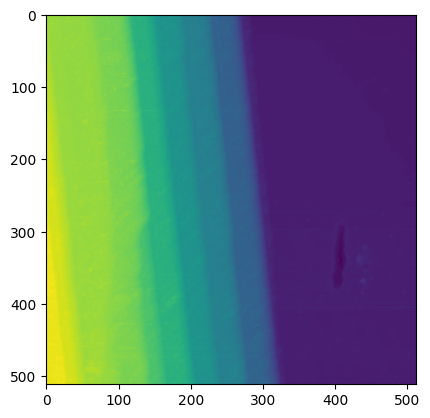

In [75]:
ds_image = hfile["Measurement_001/STM Image/Image/Image"]
ds_image = np.asarray(ds_image)
plt.imshow(ds_image)

In [70]:
image_dict = dset.metadata['image_attr']
print(image_dict)
print(f"frame_size = {image_dict['frame_size']}, pixels = {image_dict['pixels']}")


{'frame_size': 250, 'pixels': 512}
frame_size = 250, pixels = 512


In [82]:
dr = SciFiReaders.NSIDReader(input_file_path)
#dr.view_metadata()
dset = dr.read()[0]
print(dset.shape)
assert isinstance(dset, sidpy.Dataset)

(267, 4, 121)


In [77]:
itr = 1

channel = 1

In [78]:
#DKL Position

position_dict = dset.metadata['DKL_position']
print(f'DKL position =  {position_dict[str(itr)]}')

scalar_dict = dset.metadata['DKL_scalar']
print(f'DKL scalar =  {scalar_dict[str(itr)]}')


DKL position =  [29.296875  73.2421875]
DKL scalar =  4.254984627627863e-09


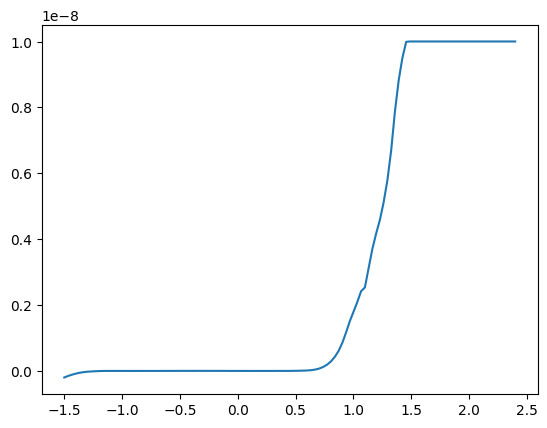

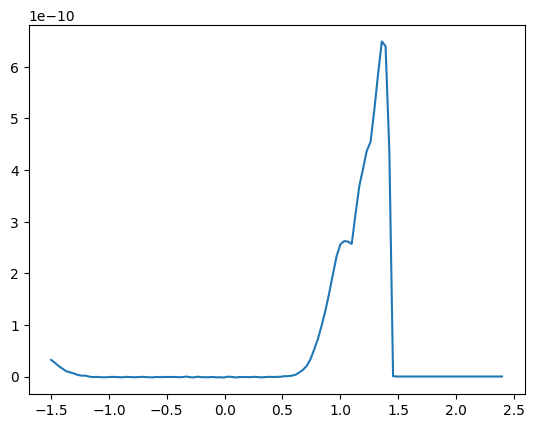

In [88]:
dataset = np.asarray(dset)

bias =  dataset[itr, 0]
current = dataset[itr][1]
didv = dataset[itr][2]
#print(bias[0])

plt.plot(bias, current)
plt.
plt.show()

plt.plot(bias, didv)
plt.show()

In [82]:
dataset = hfile["Measurement_000/Tunneling_spectroscopy/tunneling_spectroscopy/metadata"]
dataset = np.asarray(dataset)

In [83]:
dataset.shape

(2,)

In [89]:
metadata = hfile["Measurement_000/Tunneling_spectroscopy/tunneling_spectroscopy/metadata"]
print(metadata.get('DKL_scalar'))

<HDF5 group "/Measurement_000/Tunneling_spectroscopy/tunneling_spectroscopy/metadata/DKL_scalar" (0 members)>


Access and plot data

[-1.50000000e+00 -2.29374075e-10  2.63393387e-11  2.02452135e-11
 -1.50000000e+00 -1.98336597e-10  3.21158412e-11  1.99895604e-11
 -1.50000000e+00 -2.01924963e-10  1.35672506e-11  1.98139300e-11
 -1.50000000e+00 -2.59553073e-10  2.25409483e-11  2.81364480e-11
 -1.50000000e+00 -1.91239372e-10  1.22561692e-11  1.93568373e-11
 -1.50000000e+00 -1.92034985e-10  8.43390115e-12  1.84746350e-11
 -1.50000000e+00 -2.07316983e-10  1.57358657e-11  1.95152575e-11
 -1.50000000e+00 -2.25552854e-10  3.53558155e-11  1.99644884e-11
 -1.50000000e+00 -2.13104354e-10  3.34299428e-11  2.07158839e-11
 -1.50000000e+00 -2.01887118e-10  9.40861711e-12  1.85948392e-11
 -1.50000000e+00 -1.75310391e-10  6.97393619e-12  1.59861620e-11
 -1.50000000e+00 -1.83800780e-10  1.06972599e-11  1.73496807e-11
 -1.50000000e+00 -2.17952822e-10  2.53073430e-11  1.87104464e-11
 -1.50000000e+00 -1.85696597e-10  1.07095886e-11  1.92245057e-11
 -1.50000000e+00 -2.02047046e-10  2.40814590e-11  1.97819244e-11
 -1.50000000e+00 -1.79690

ValueError: x and y must have same first dimension, but have shapes (4, 121) and (121,)

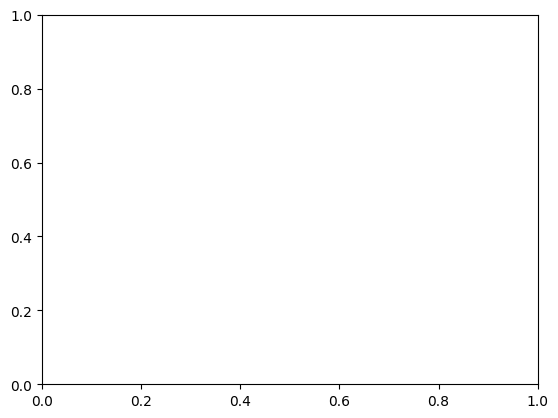

In [81]:
#DKL iteration
itr = 0

#Spectroscopy Channel =  0: bias, 1: current; 2: didiv(LIX); 3: LIY
channel = 1

bias =  dataset[0]
y_channel = dataset[itr][channel]

print(bias[0])

plt.plot(bias, y_channel)

In [25]:
import SciFiReaders
import pyNSID
import SciFiReaders.NSIDReader as dsread

dr = dsread(input_file_path)

ModuleNotFoundError: No module named 'SciFiReaders.NSIDReader'